If you run into this error:
> ---------------------------------------------------------------------------
``` ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-2-a825e4b73726> in <cell line: 9>()
      7 import seaborn as sns
      8
----> 9 from pycaret.clustering import *
     10 from sklearn.cluster import KMeans
     11 from sklearn.metrics import silhouette_score
ModuleNotFoundError: No module named 'pycaret'

**Go to runtime then restart the kernel. It should work.**

# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
# !pip install --user --upgrade tables
# !pip install --user pycaret
# !pip install pycaret[full]==2.3.4
!pip install pycaret
# Install or upgrade required libraries
# !pip install pandas scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

region=14
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
3867,2998027,Lubo-ong,Hungduan,Ifugao,0.087272,0.966335,0.175536,1.0,0,1,1,3002177,7.602789,45.045729,26.347515,329.343749,156.385168,71.818181,62.044108,0.670273
1907,2974548,Lengaoan,Buguias,Benguet,0.134478,0.700967,0.267817,1.0,0,1,1,2967636,8.163941,64.317122,40.340302,694.248691,323.313387,178.015508,163.042270,0.668502


In [3]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

## train

In [4]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2937258
1,2938639
2,2938640
3,2938641
4,2939947
...,...
8031,3060187
8032,3061563
8033,3061564
8034,3061565


In [5]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(8036, 1)"
2,Transformed data shape,"(8036, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


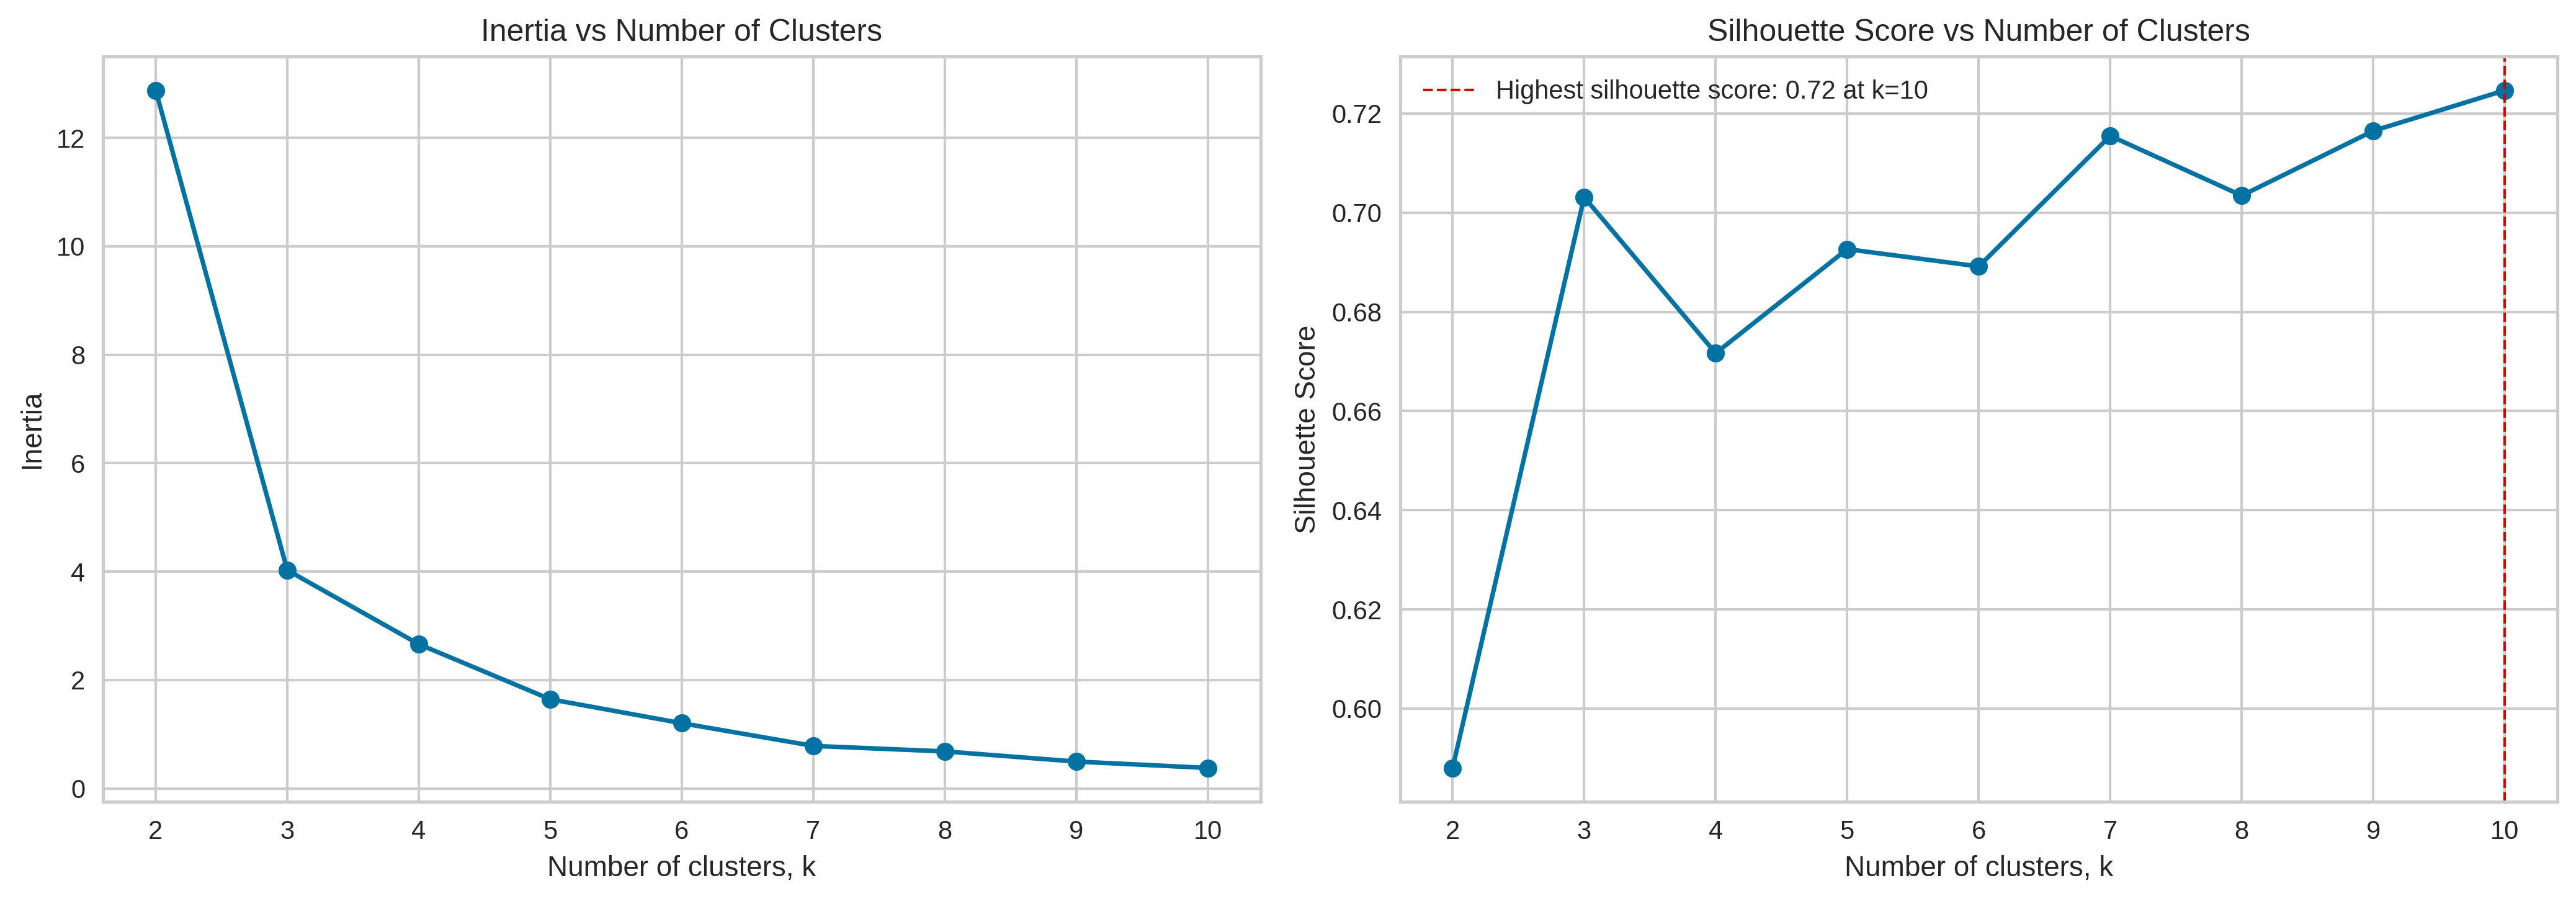

In [6]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6709,21882.6123,0.4657,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

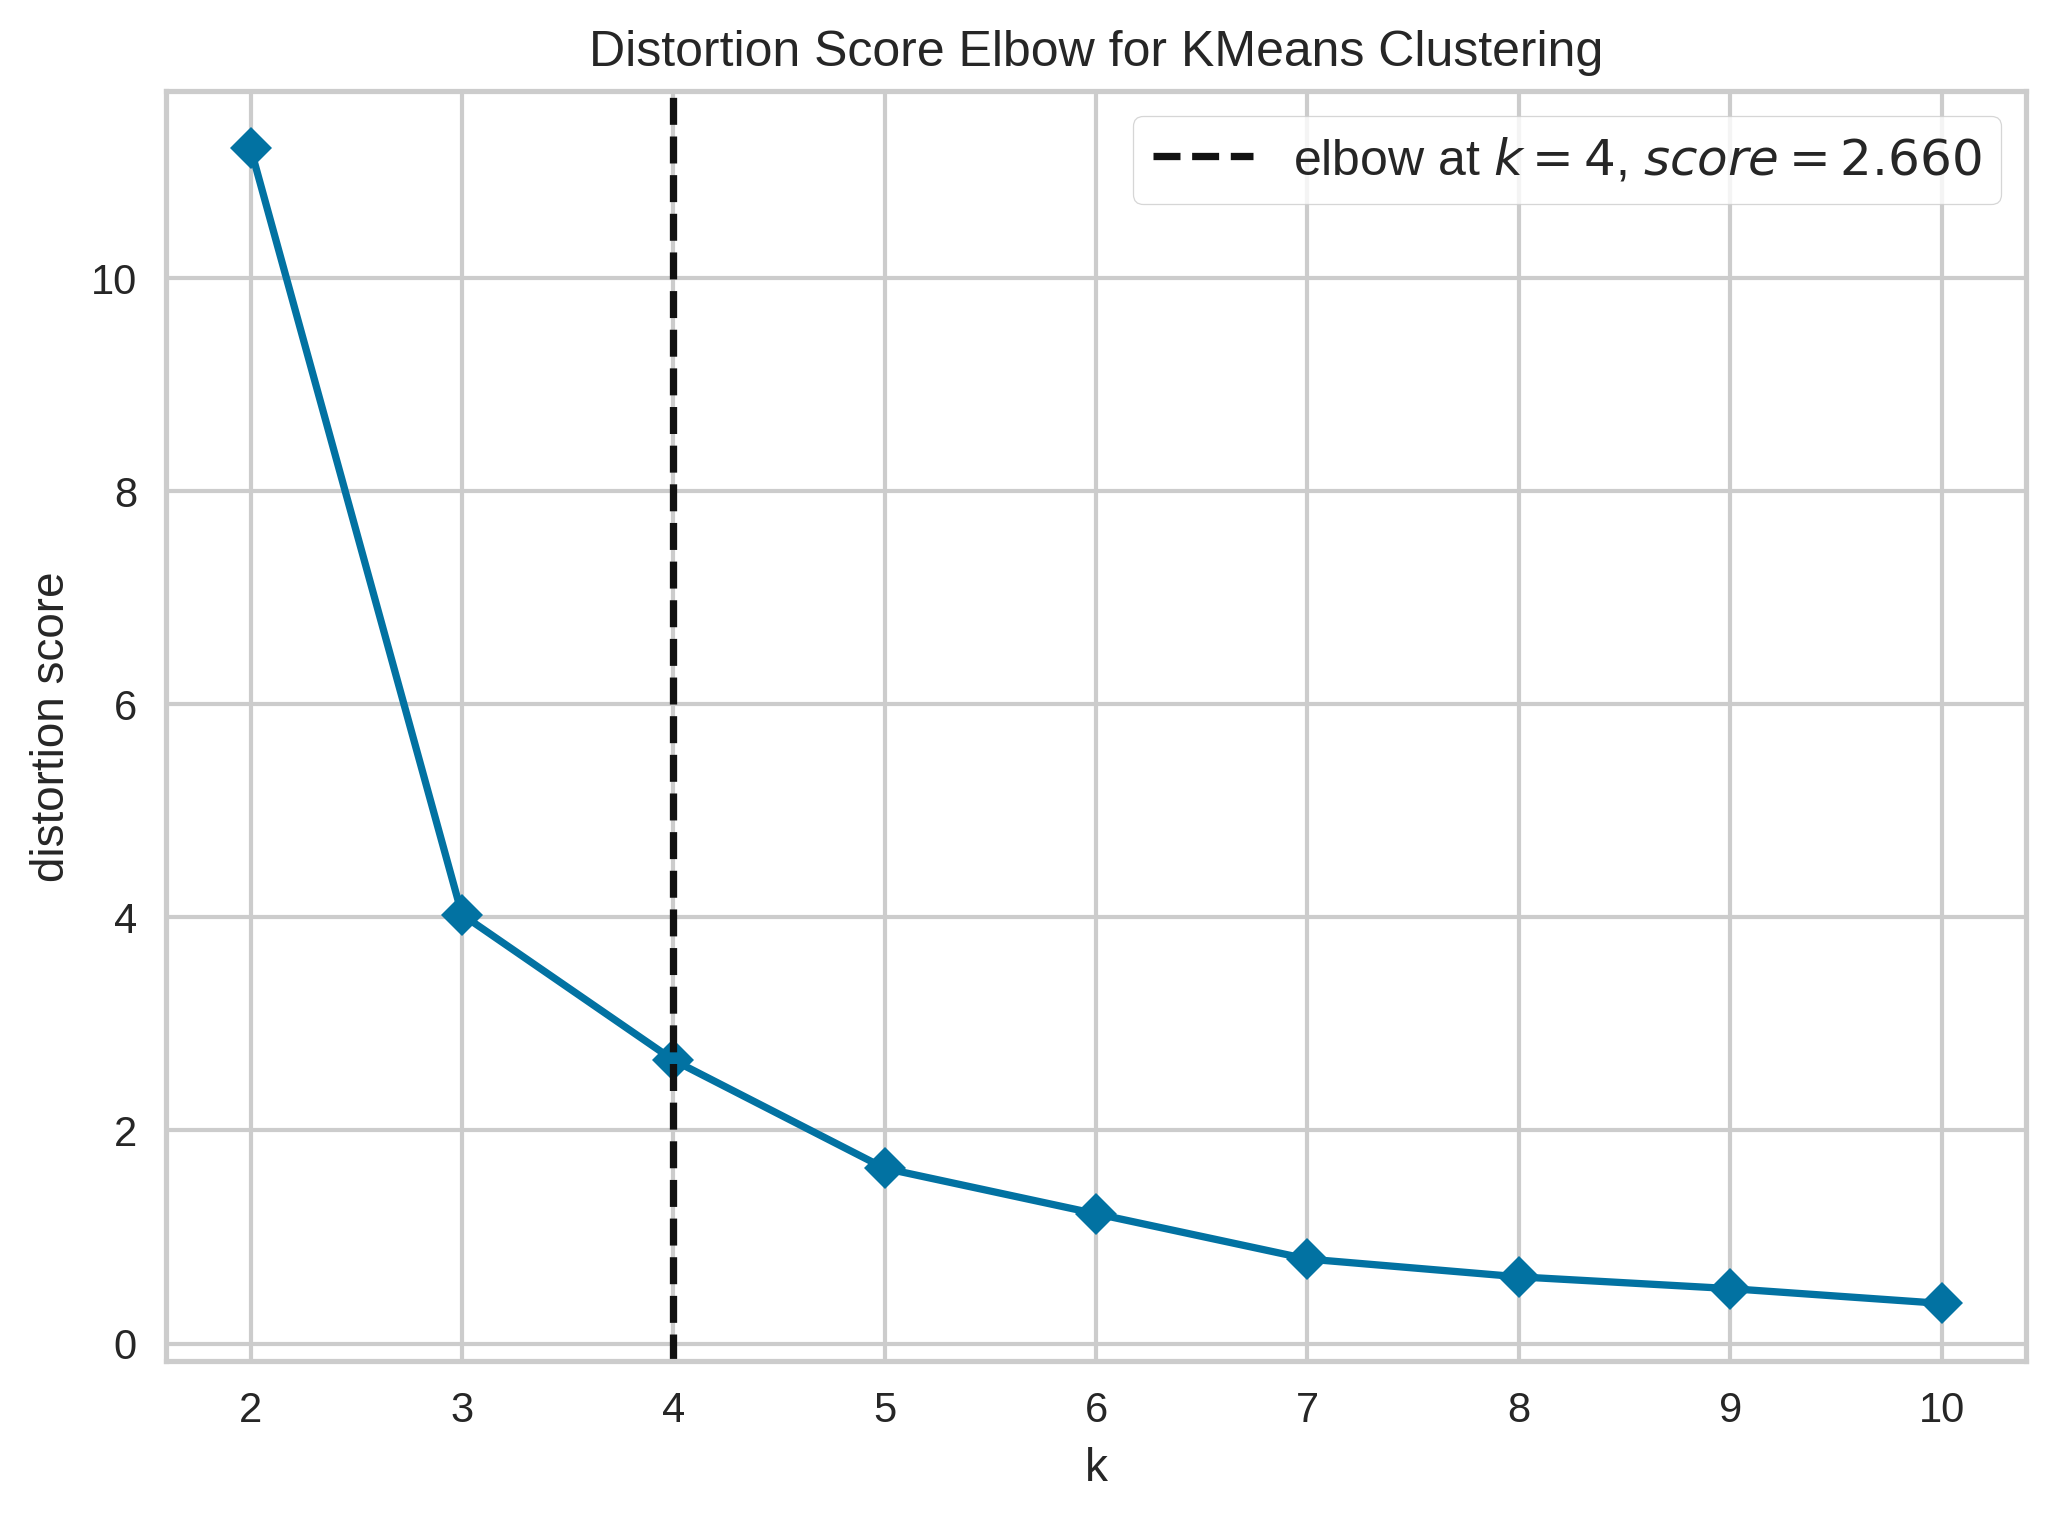

In [8]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [9]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [11]:
model = create_model('kmeans', num_clusters = 10)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters-silhouette')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7245,56856.7404,0.4614,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 0
1,0.384188,Cluster 1
2,0.500000,Cluster 0
3,0.447876,Cluster 3
4,0.500000,Cluster 0
5,0.500000,Cluster 0
6,0.452927,Cluster 3
7,0.386883,Cluster 1
8,0.500000,Cluster 0
9,0.500000,Cluster 0


In [10]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6709,21882.6123,0.4657,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 0
1,0.384188,Cluster 1
2,0.500000,Cluster 0
3,0.447876,Cluster 3
4,0.500000,Cluster 0
5,0.500000,Cluster 0
6,0.452927,Cluster 3
7,0.386883,Cluster 1
8,0.500000,Cluster 0
9,0.500000,Cluster 0


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list


for cluster_name, cluster_list in lists.items():
  # print(f"Cluster {cluster_name}: {cluster_list}")
  print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

max, min, total 0.5444172024726868 | 0.4817451238632202 | 4787
max, min, total 0.42209678888320923 | 0.32709798216819763 | 852
max, min, total 0.6702731847763062 | 0.544655978679657 | 1182
max, min, total 0.4816092550754547 | 0.4226705729961395 | 1215


,HCFAI,Accessibility Level
3867,0.670273,Cluster 2
1907,0.668502,Cluster 2
3618,0.668221,Cluster 2
2019,0.667888,Cluster 2
3735,0.667758,Cluster 2
...,...,...
6533,0.327858,Cluster 1
6647,0.327858,Cluster 1
7124,0.327770,Cluster 1
7126,0.327722,Cluster 1


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))
x = x.replace(['Cluster 3'],int(0))

x['ID'] = IDdf

df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,2937258,San Pascual,Tuba,Benguet,0.660628,1.040006,1.016222,0.0,0,0,...,11.881194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,2938639,San Pascual,Tuba,Benguet,0.660628,1.040006,1.016222,0.0,0,0,...,10.521039,4.463704,3.074064,42.700084,20.802600,10.990840,9.390640,0.384188,0.384188,0
2,2938640,San Pascual,Tuba,Benguet,0.660628,1.040006,1.016222,0.0,0,0,...,10.795344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
3,2938641,San Pascual,Tuba,Benguet,0.660628,1.040006,1.016222,0.0,0,1,...,11.184976,2.169792,2.414076,22.531374,11.466858,5.618472,4.195896,0.447876,0.447876,0
4,2939947,Tangadan,San Quintin,Abra,0.889123,0.085881,1.329499,1.0,0,0,...,6.613961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,3060187,Romualdez,Rizal (Liwan),Kalinga,0.796756,1.049184,1.303862,1.0,0,0,...,35.795511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
8032,3061563,Calaocan,Rizal (Liwan),Kalinga,0.928698,0.982442,1.309814,1.0,0,0,...,43.542730,1.536035,0.772565,12.261030,6.080525,3.181145,2.653980,0.460966,0.460966,0
8033,3061564,Santor,Rizal (Liwan),Kalinga,0.883437,1.023447,1.311747,1.0,0,0,...,42.621524,3.379277,1.699643,26.974266,13.377155,6.998519,5.838756,0.462201,0.462201,0
8034,3061565,Santor,Rizal (Liwan),Kalinga,0.883437,1.023447,1.311747,1.0,0,0,...,41.284935,2.689638,1.304456,22.014504,10.725258,5.651336,4.948002,0.462201,0.462201,0


In [ ]:
print(df.columns)

df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')


,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,2937258,San Pascual,Tuba,Benguet,0.660628,1.040006,1.016222,0.0,0,0,...,2949695,11.881194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,2938639,San Pascual,Tuba,Benguet,0.660628,1.040006,1.016222,0.0,0,0,...,2949695,10.521039,4.463704,3.074064,42.700084,20.802600,10.990840,9.390640,0.384188,0
2,2938640,San Pascual,Tuba,Benguet,0.660628,1.040006,1.016222,0.0,0,0,...,2949695,10.795344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
3,2938641,San Pascual,Tuba,Benguet,0.660628,1.040006,1.016222,0.0,0,1,...,2949695,11.184976,2.169792,2.414076,22.531374,11.466858,5.618472,4.195896,0.447876,0
4,2939947,Tangadan,San Quintin,Abra,0.889123,0.085881,1.329499,1.0,0,0,...,2945473,6.613961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,3060187,Romualdez,Rizal (Liwan),Kalinga,0.796756,1.049184,1.303862,1.0,0,0,...,3036709,35.795511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
8032,3061563,Calaocan,Rizal (Liwan),Kalinga,0.928698,0.982442,1.309814,1.0,0,0,...,3036709,43.542730,1.536035,0.772565,12.261030,6.080525,3.181145,2.653980,0.460966,0
8033,3061564,Santor,Rizal (Liwan),Kalinga,0.883437,1.023447,1.311747,1.0,0,0,...,3036709,42.621524,3.379277,1.699643,26.974266,13.377155,6.998519,5.838756,0.462201,0
8034,3061565,Santor,Rizal (Liwan),Kalinga,0.883437,1.023447,1.311747,1.0,0,0,...,3036709,41.284935,2.689638,1.304456,22.014504,10.725258,5.651336,4.948002,0.462201,0


In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')